# A Clique-Related Measure on Graph Edges

In [1]:
%matplotlib inline 

import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

True
15
40


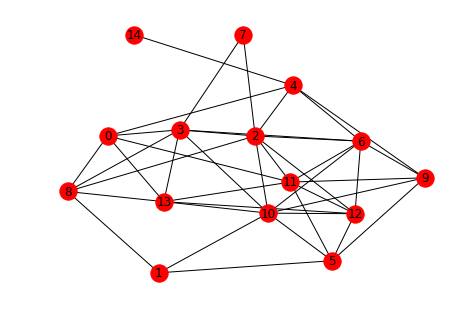

In [2]:
number_of_nodes = 15
number_of_edges = 40

G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  

# while True:
#     G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  
#     if nx.number_connected_components(G)==1:
#         break
        
print nx.is_connected(G)
print len(G.nodes())
print len(G.edges())
nx.draw(G, with_labels=True)

In [3]:
def cec(G):
    cdic=nx.cliques_containing_node(G)
    scdic={}
    for k,v in cdic.items():
        vv=[]
        for i in range(len(v)):
            v[i]=tuple(v[i])
            vv.append(v[i])
        v_set = set(tuple(x) for x in vv)
        scdic[k]=v_set
    cel=[]
    for e in G.edges():
        c0=set(scdic[e[0]])
        c1=set(scdic[e[1]])
        ce=set(c0).intersection(c1)
        cel.append(list(set(c0).intersection(c1)))
    lcel=[]
    for i in cel:
        lcel.append(len(i))
    return dict(zip(G.edges(),cel)), dict(zip(G.edges(),lcel))

In [4]:
# print nx.cliques_containing_node(G)
# cec(G)

In [5]:
def cn(G,e):
    return len(list(set(G.neighbors(e[0])).intersection(G.neighbors(e[1]))))

def ccec(G):
    cdic=nx.cliques_containing_node(G)
    scdic={}
    for k,v in cdic.items():
        vv=[]
        for i in range(len(v)):
            v[i]=tuple(v[i])
            vv.append(v[i])
        v_set = set(tuple(x) for x in vv)
        scdic[k]=v_set
    cel=[]
    for e in G.edges():
        c0=set(scdic[e[0]])
        c1=set(scdic[e[1]])
        ce=set(c0).intersection(c1)
        cel.append(list(set(c0).intersection(c1)))
#     lcel=[]
#     for i in cel:
#         lcel.append(len(i))
    lccel=[]
    for i in cel:
        counter=0
        for j in range(len(i)):
            counter+=1/float(len(i[j]))
        lccel.append(counter)
#     return dict(zip(G.edges(),cel)), dict(zip(G.edges(),lccel))
    ddd=dict(zip(G.edges(),lccel))
    dddd={}
    for k,v in ddd.items():
        dddd[k]=v*cn(G,k)
    ccc={}
    for e in G.edges():
        ccc[e]=cn(G,e)
    ncc={}
    for k,v in dddd.items():
        ncc[k]=v/max(dddd.values())
    return dict(zip(G.edges(),cel)), ccc, dict(zip(G.edges(),lccel)), dddd, ncc

In [6]:
# for v,k in ccec(G)[0].items():
#     print v,k
# print
# for v,k in ccec(G)[1].items():
#     print v,k
# print
# # # for v,k in ccec(G)[2].items():
# # #     print v,k
# # # print
# # for v,k in ccec(G)[3].items():
# #     print v,k
for v,k in ccec(G)[4].items():
    print v,k

(5, 9) 0.246153846154
(6, 9) 0.553846153846
(8, 13) 0.0923076923077
(2, 8) 0.0615384615385
(0, 13) 0.323076923077
(2, 12) 0.276923076923
(3, 7) 0.0615384615385
(0, 3) 0.0923076923077
(4, 9) 0.0615384615385
(12, 13) 0.246153846154
(3, 10) 0.323076923077
(6, 10) 0.615384615385
(10, 12) 0.676923076923
(5, 12) 0.246153846154
(1, 5) 0.0615384615385
(0, 11) 0.0615384615385
(9, 11) 0.246153846154
(3, 6) 0.0923076923077
(0, 4) 0.0
(1, 10) 0.0615384615385
(5, 11) 0.246153846154
(11, 13) 0.246153846154
(2, 6) 1.0
(3, 13) 0.323076923077
(6, 11) 0.323076923077
(10, 13) 0.246153846154
(4, 14) 0.0
(2, 10) 0.276923076923
(9, 10) 0.246153846154
(2, 3) 0.676923076923
(6, 12) 0.276923076923
(0, 8) 0.0923076923077
(11, 12) 0.676923076923
(2, 7) 0.0615384615385
(5, 10) 0.553846153846
(4, 6) 0.246153846154
(2, 11) 0.0923076923077
(3, 8) 0.323076923077
(1, 8) 0.0
(2, 4) 0.0615384615385


In [9]:
for v,k in ccec(G)[4].items():
    print 't(%s) = %.4f' %(v,k)

t((5, 9)) = 0.2462
t((6, 9)) = 0.5538
t((8, 13)) = 0.0923
t((2, 8)) = 0.0615
t((0, 13)) = 0.3231
t((2, 12)) = 0.2769
t((3, 7)) = 0.0615
t((0, 3)) = 0.0923
t((4, 9)) = 0.0615
t((12, 13)) = 0.2462
t((3, 10)) = 0.3231
t((6, 10)) = 0.6154
t((10, 12)) = 0.6769
t((5, 12)) = 0.2462
t((1, 5)) = 0.0615
t((0, 11)) = 0.0615
t((9, 11)) = 0.2462
t((3, 6)) = 0.0923
t((0, 4)) = 0.0000
t((1, 10)) = 0.0615
t((5, 11)) = 0.2462
t((11, 13)) = 0.2462
t((2, 6)) = 1.0000
t((3, 13)) = 0.3231
t((6, 11)) = 0.3231
t((10, 13)) = 0.2462
t((4, 14)) = 0.0000
t((2, 10)) = 0.2769
t((9, 10)) = 0.2462
t((2, 3)) = 0.6769
t((6, 12)) = 0.2769
t((0, 8)) = 0.0923
t((11, 12)) = 0.6769
t((2, 7)) = 0.0615
t((5, 10)) = 0.5538
t((4, 6)) = 0.2462
t((2, 11)) = 0.0923
t((3, 8)) = 0.3231
t((1, 8)) = 0.0000
t((2, 4)) = 0.0615


In [7]:
for i in G.edges():
    print i

(0, 8)
(0, 11)
(0, 3)
(0, 4)
(0, 13)
(1, 8)
(1, 10)
(1, 5)
(2, 3)
(2, 4)
(2, 6)
(2, 7)
(2, 8)
(2, 10)
(2, 11)
(2, 12)
(3, 6)
(3, 7)
(3, 8)
(3, 10)
(3, 13)
(4, 9)
(4, 6)
(4, 14)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(8, 13)
(9, 10)
(9, 11)
(10, 12)
(10, 13)
(11, 12)
(11, 13)
(12, 13)


In [10]:
G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]